In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

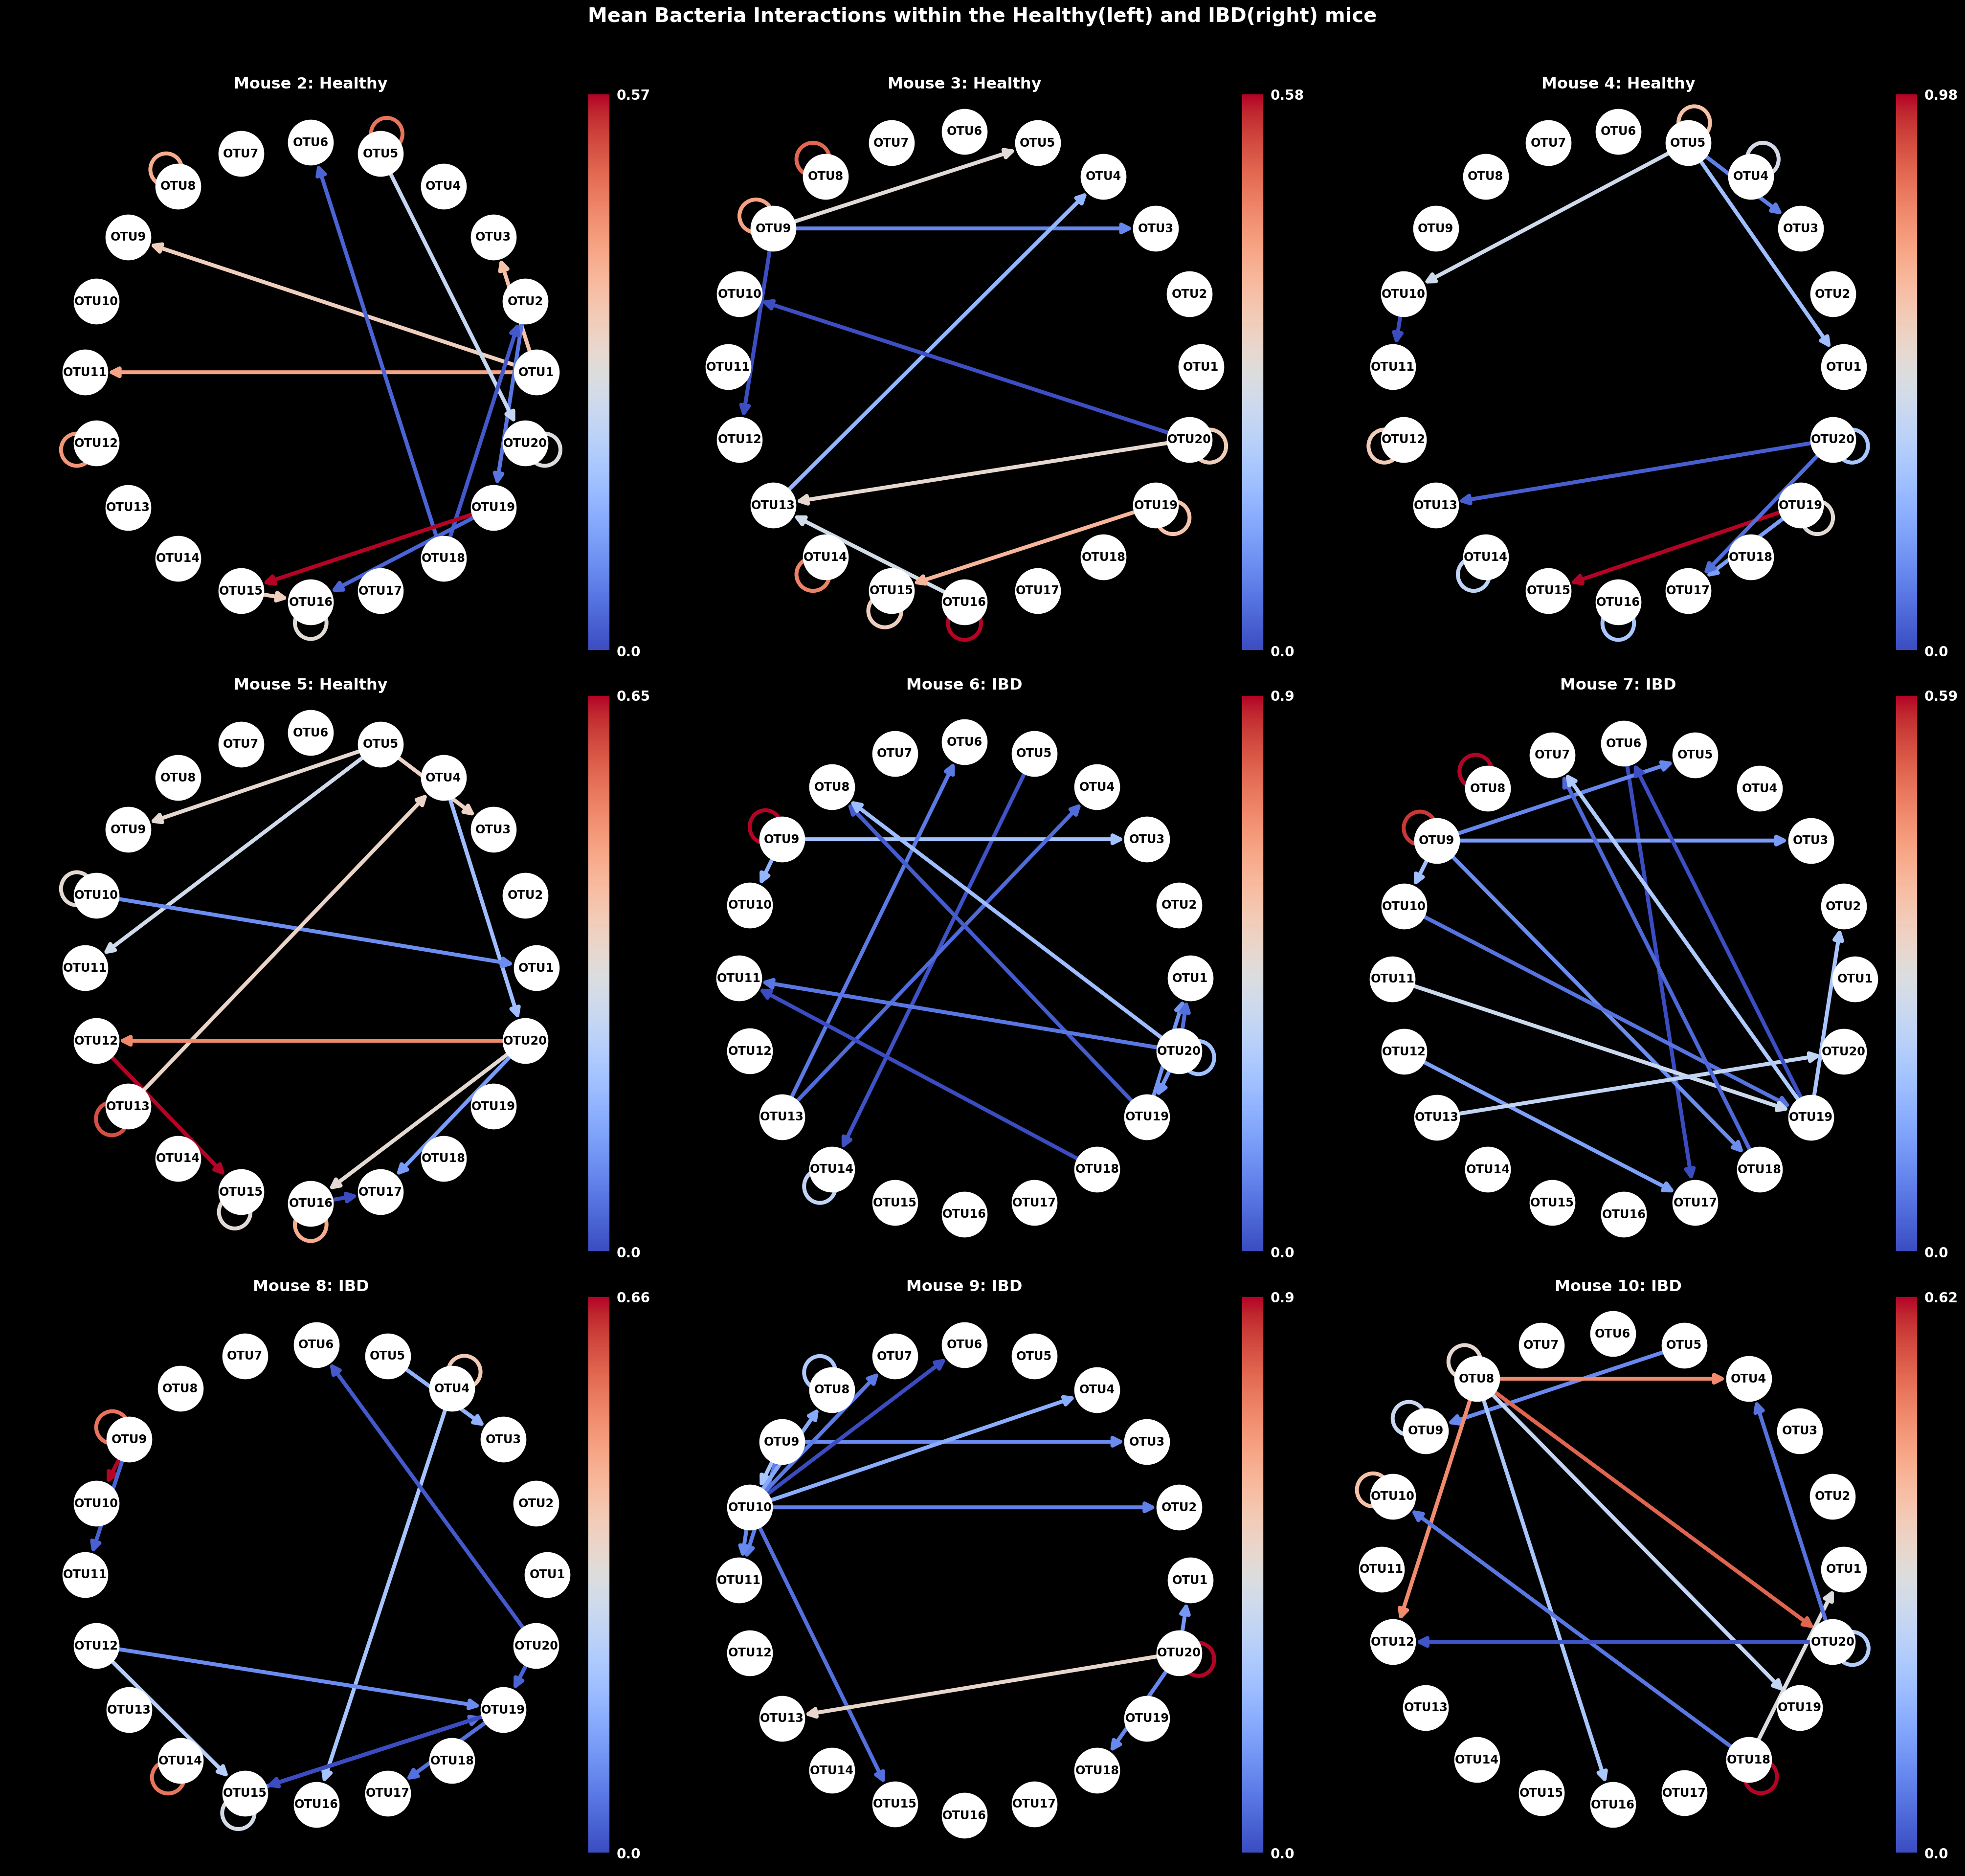

In [3]:
plot_how_many = 15 # Indicate how many interactions you want to plot!

all_heatmaps = np.load('all_mice_heatmaps.npy')
f, ax = plt.subplots(3,3, figsize=(28,28))
ax=ax.flatten()
for k,mouse in enumerate(range(2,11)):
    Heatmap=all_heatmaps[k,-1,:,:]
    G = nx.MultiDiGraph()
    length = len(Heatmap)
    ids = list()
    for i in range(length):
        ids.append('OTU'+str(i+1))
        G.add_node(ids[i], size=100)
    widths=[]
    sort = np.sort(Heatmap.flatten())
    self_loop=[]
    
    for i in range(length):
        for j in range(length):
            if Heatmap[j,i] > sort[-plot_how_many-1] : 
                G.add_edge(ids[i],ids[j])
                widths.append(Heatmap[j,i])
                if i == j: 
                    self_loop.append(Heatmap[j,i])
                    
    widths=np.array(widths)/sort[-1]
    pos = nx.circular_layout(G)
    norm = mpl.colors.Normalize(vmin=0, vmax=sort[-1])
    cmap = mpl.cm.get_cmap('coolwarm')
    
    im = nx.draw_circular(G, with_labels=True, node_size=2100, node_color='w', font_color='k',
                          edge_color=list(widths.flatten()), ax = ax[k], edge_cmap=plt.cm.coolwarm, 
                          vmin=0, vmax=1, alpha=1,
                          width=4, hold=True, arrowsize=20, font_size=12, font_weight='bold',
                          connectionstyle='arc3, rad=0.1')
    for i,idx in enumerate(G.nodes_with_selfloops()): 
        circle = plt.Circle((pos[idx][0]*1.09, pos[idx][1]*1.09), radius=0.07, 
                            edgecolor=cmap(self_loop[i]/sort[-1]), fill=False, linewidth=4)
        ax[k].add_artist(circle)    

    divider = make_axes_locatable(ax[k])
    cax = divider.append_axes('right', size='4%', pad=0.06)
    cb1 = mpl.colorbar.ColorbarBase(ax=cax, cmap = plt.cm.coolwarm, 
                                    norm = norm, ticks=[0*sort[-plot_how_many], sort[-1]])
    cax.set_yticklabels([0*round(sort[-plot_how_many],2), round(sort[-1],2)], 
                           color = 'w', size=14, fontweight='bold')
    title = ': Healthy' if mouse in range(2,6) else ': IBD'
    ax[k].set_title('Mouse ' + str(mouse) + title ,color ='w', size=16, fontweight='bold')

f.tight_layout(rect=[0, 0.03, 1, 0.95])
f.set_facecolor('k')
f.suptitle('Mean Bacteria Interactions within the Healthy(left) and IBD(right) mice', color = 'w', size=20, fontweight='bold')
plt.show()

In [4]:
all_heatmaps = np.load('all_mice_heatmaps.npy')
Heatmap_mean={}
Heatmap_mean[0]=np.mean(all_heatmaps[0:4,-1,:,:] ,axis=0) 
Heatmap_mean[1]=np.mean(all_heatmaps[4:,-1,:,:] ,axis=0) 

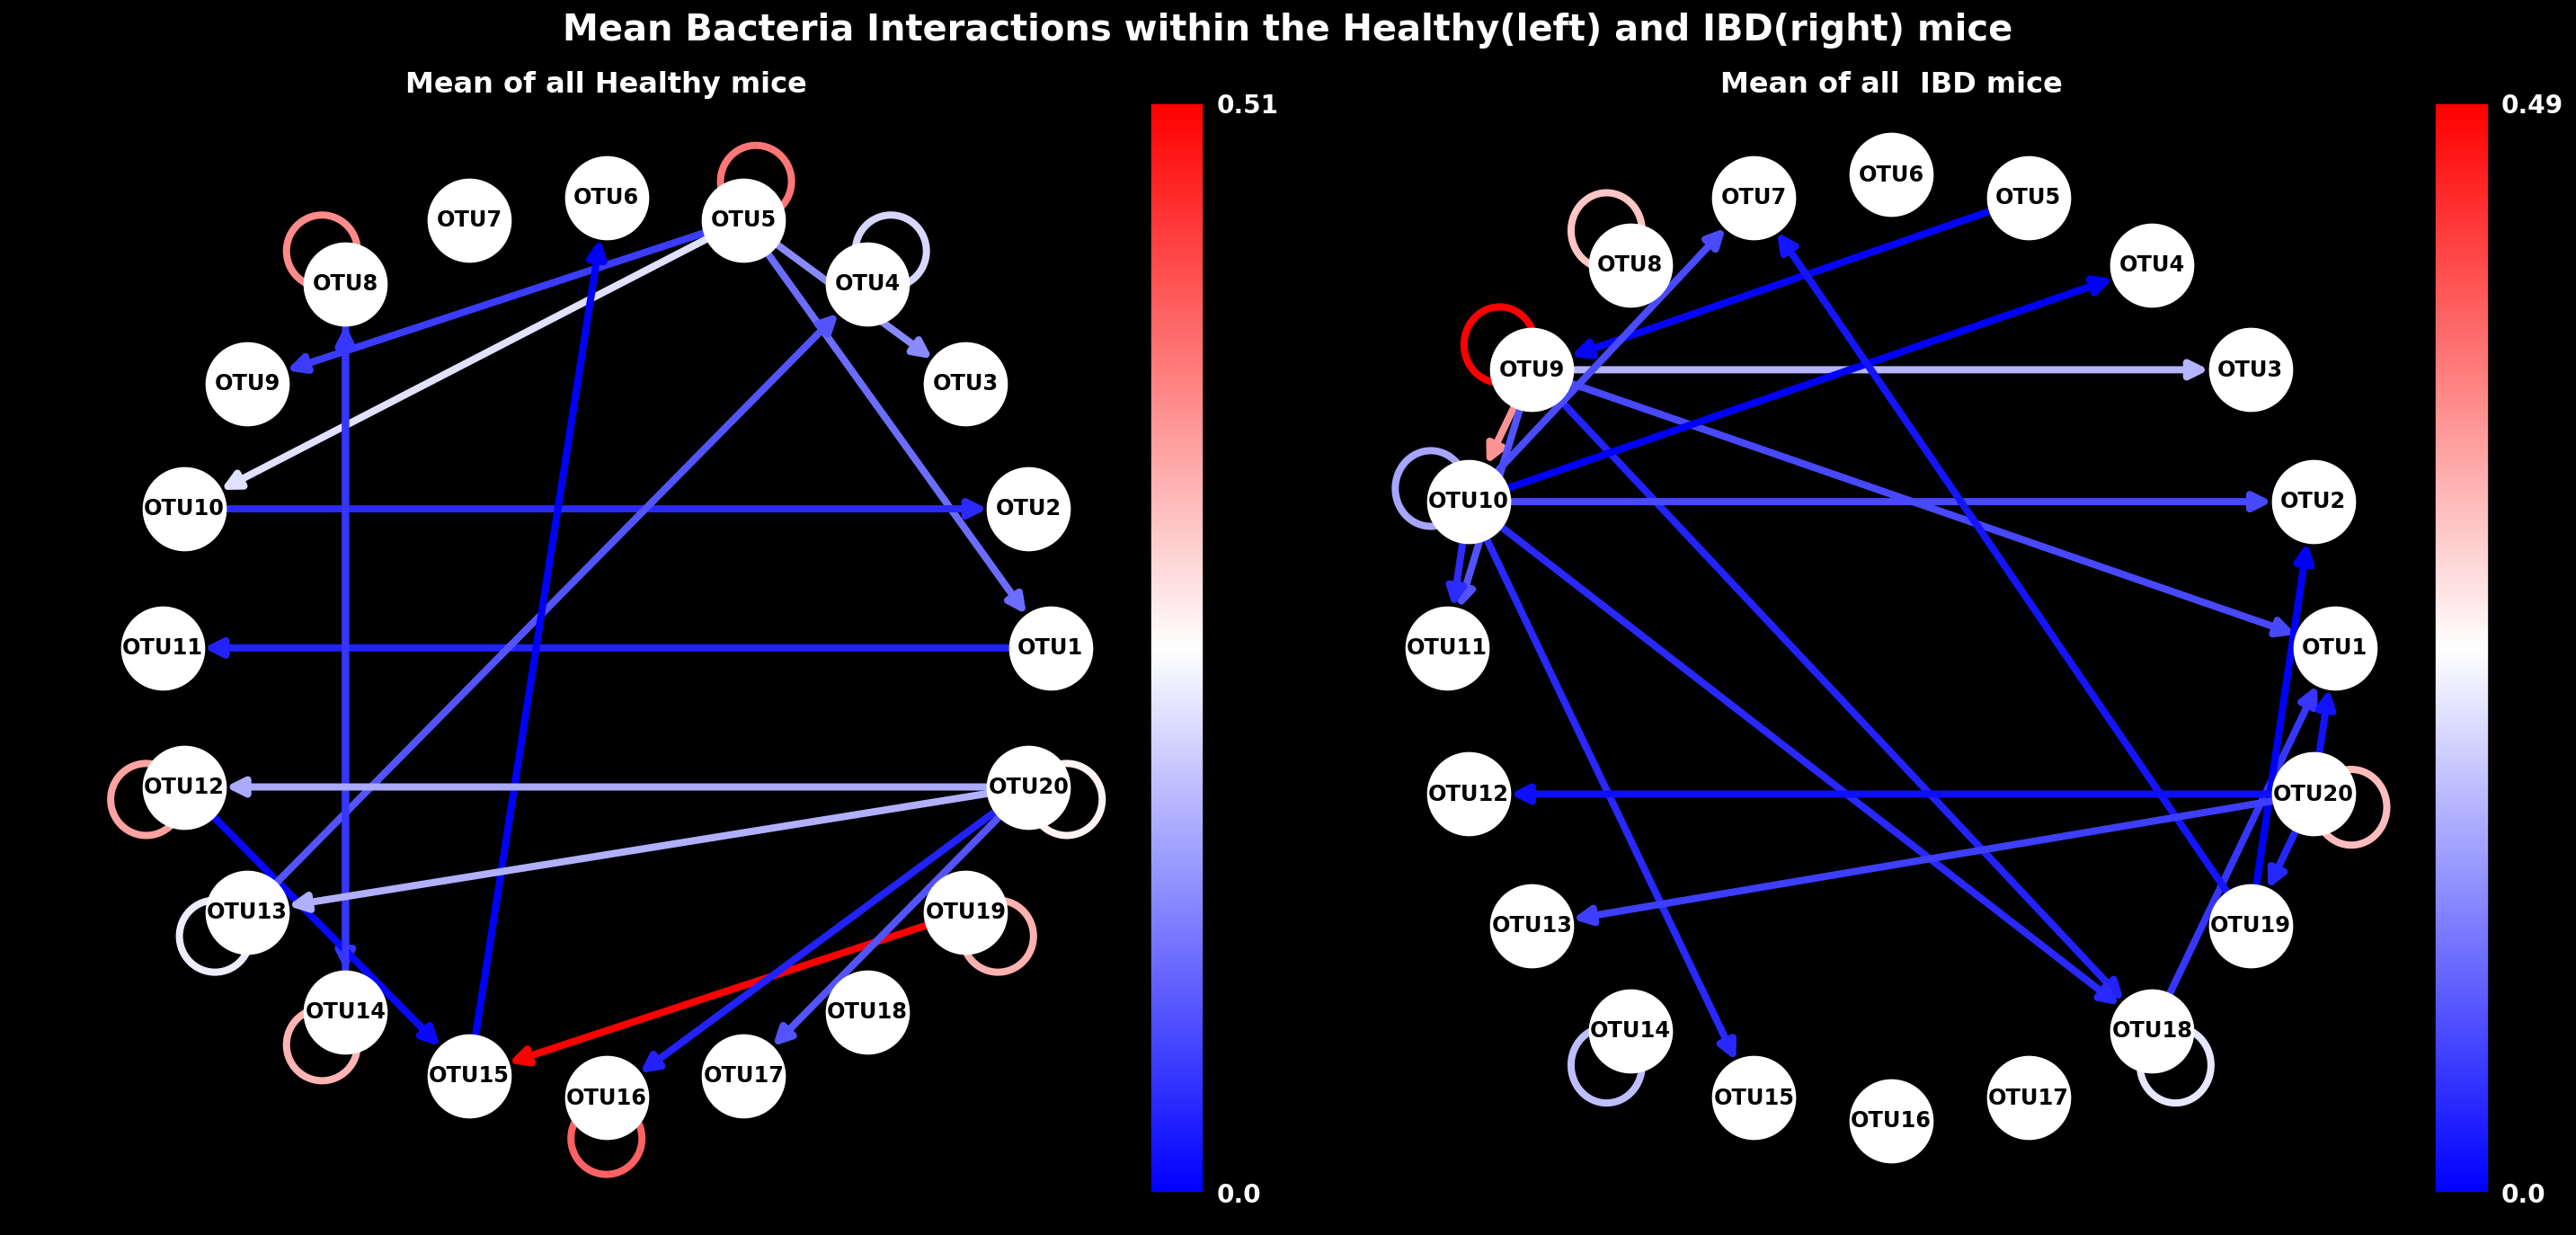

In [5]:
f, ax = plt.subplots(1,2, figsize=(20,10))
plot_how_many = 25
ax=ax.flatten()

Heatmap=all_heatmaps[k,-1,:,:]
for k in range(0,2):
    Heatmap=Heatmap_mean[k]
    G = nx.MultiDiGraph()
    length = len(Heatmap)
    ids = list()
    for i in range(length):
        ids.append('OTU'+str(i+1))
        G.add_node(ids[i], size=100)
    widths=[]
    sort = np.sort(Heatmap.flatten())
    self_loop=[]
    
    for i in range(length):
        for j in range(length):
            if Heatmap[j,i] > sort[-plot_how_many-1] : 
                G.add_edge(ids[i],ids[j])
                widths.append(Heatmap[j,i])
                if i == j: 
                    self_loop.append(Heatmap[j,i])
                    
    widths=np.array(widths)/sort[-1]
    pos = nx.circular_layout(G)
    norm = mpl.colors.Normalize(vmin=0, vmax=sort[-1])
    cmap = mpl.cm.get_cmap('bwr')
    
    im = nx.draw_circular(G, with_labels=True, node_size=2100, node_color='w', font_color='k',
                          edge_color=list(widths.flatten()), ax = ax[k], edge_cmap=plt.cm.bwr, 
                          vmin=0, vmax=1, alpha=1,
                          width=4, hold=True, arrowsize=20, font_size=12, font_weight='bold',
                          connectionstyle='arc3, rad=0.1')
    for i,idx in enumerate(G.nodes_with_selfloops()): 
        circle = plt.Circle((pos[idx][0]*1.09, pos[idx][1]*1.09), radius=0.08, 
                            edgecolor=cmap(self_loop[i]/sort[-1]), fill=False, linewidth=4)
        ax[k].add_artist(circle)    

    divider = make_axes_locatable(ax[k])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cb1 = mpl.colorbar.ColorbarBase(ax=cax, cmap = plt.cm.bwr, 
                                    norm = norm, ticks=[0*sort[-plot_how_many], sort[-1]])
    cax.set_yticklabels([0*round(sort[-plot_how_many],2), round(sort[-1],2)], 
                           color = 'w', size=14, fontweight='bold')
    title = 'Healthy mice' if k==0 else ' IBD mice'
    ax[k].set_title('Mean of all '+ title ,color ='w', size=16, fontweight='bold')

f.tight_layout(rect=[0, 0.03, 1, 0.95])
f.set_facecolor('k')
f.suptitle('Mean Bacteria Interactions within the Healthy(left) and IBD(right) mice', color = 'w', size=20, fontweight='bold')
plt.show()

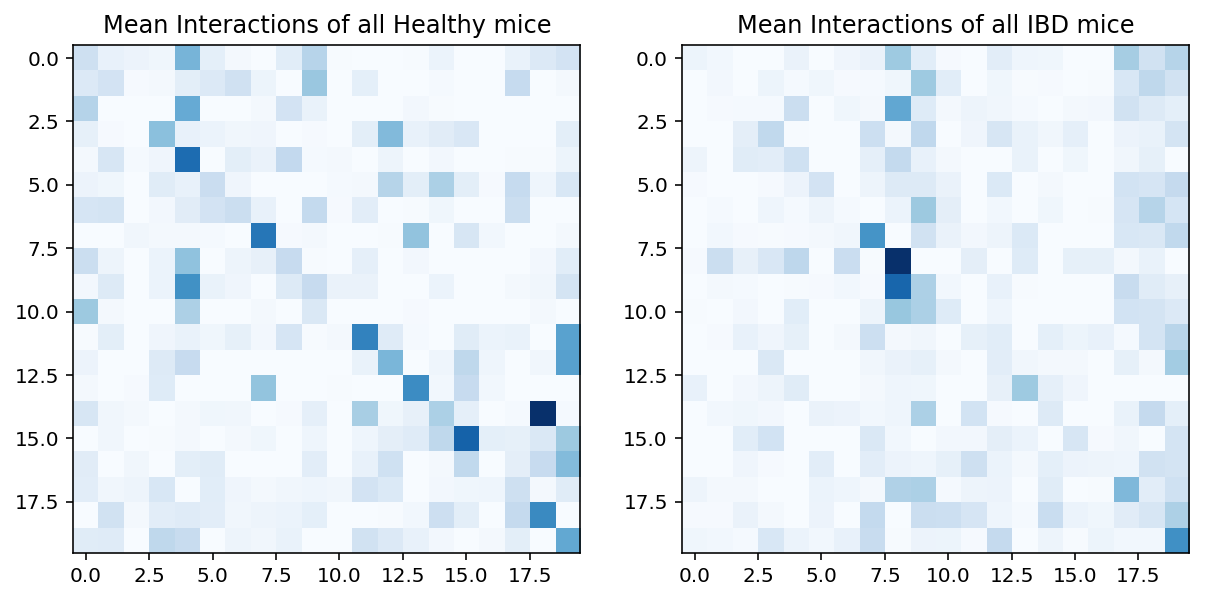

In [6]:
f,ax = plt.subplots(1,2, figsize=(10,7))
ax[0].imshow(Heatmap_mean[0], cmap='Blues');
ax[0].set_title('Mean Interactions of all Healthy mice')
ax[1].imshow(Heatmap_mean[1], cmap='Blues');
ax[1].set_title('Mean Interactions of all IBD mice')
f.show()